### Diabetes dataset project

Data source: [Kaggle](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

### Problem Statement
- Identify the diabetic and non-diabetic population
- Find the correlation between different diabetes risk factors and their diabetic status outcome.
- Check the distribution of the data
- Investigate the relationship between different diabetes risk factors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

pd.set_option("expand_frame_repr", True)

In [2]:
diabetes = pd.read_csv("C:\\Users\\gacek\\OneDrive\\Documents\\Jupiter N\\diabetes.csv")

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes.duplicated().sum()

0

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Replace the zero values with the mean of each column.
diabetes['Insulin'] = diabetes['Insulin'].replace(0, diabetes.Insulin.mean())
diabetes['Glucose'] = diabetes['Glucose'].replace(0, diabetes.Glucose.mean())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, diabetes.BloodPressure.mean())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, diabetes.SkinThickness.mean())
diabetes['BMI'] = diabetes['BMI'].replace(0, diabetes.BMI.mean())


In [10]:
diabetes.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [11]:
#Replace the Outcome column values to be characters.
conditions = [diabetes.Outcome == 1,diabetes.Outcome == 0]
outcomes = ["Yes", "No"]
diabetes['Outcome1'] = np.select(conditions, outcomes)

In [12]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,No
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,No
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Yes
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,No
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0,No
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,No
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1,Yes


### EDA

In [13]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Outcome1'],
      dtype='object')

In [14]:
print("Total patients: ", len(diabetes))

Total patients:  768


In [15]:
corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'Correlation between different features')

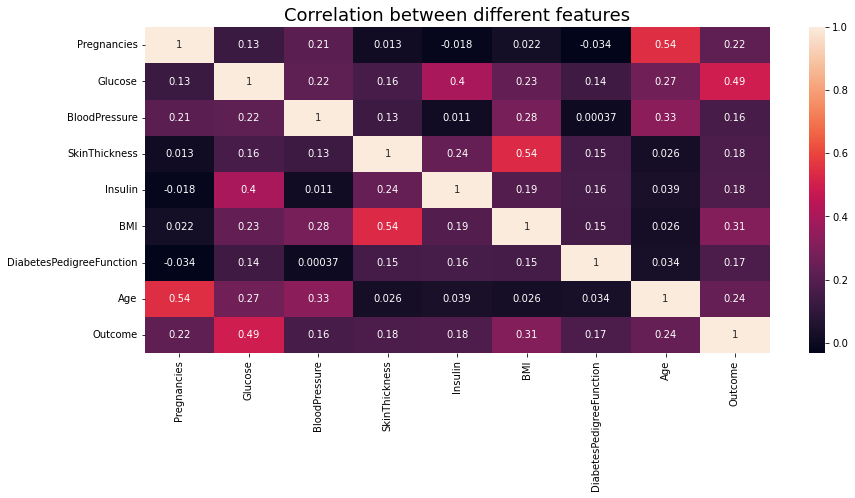

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(corr, annot =True, xticklabels = corr.columns)
plt.title("Correlation between different features", fontsize = 18)

- Pregnancies,Glucose,BMI and age have significant correlation with the outcome(being diabetic or non diabetic).
There is correlation between pregnancies, Insulin, SkinThickness and Age.

In [17]:
# Proportion of Diabetic and Non Diabetic
outcomes = diabetes.Outcome1.value_counts()
outcomes

No     500
Yes    268
Name: Outcome1, dtype: int64

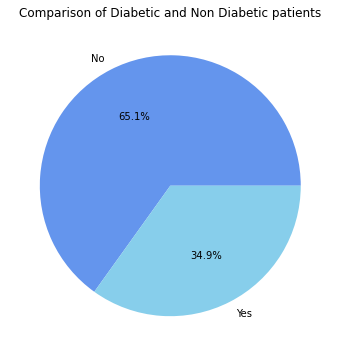

In [18]:
plt.figure(figsize=(14,6))
outcomes.plot(kind = 'pie', autopct ='%1.1f%%', colors = ["cornflowerblue", "skyblue"])
plt.axis("off");
plt.title("Comparison of Diabetic and Non Diabetic patients");

- From the data about 2/3 (65.1%) of the patients are the Non-Diabetic while 34.9% are diabetic.

Text(0.5, 1.0, 'Diabetic and Non-Diabetic patients by Average age')

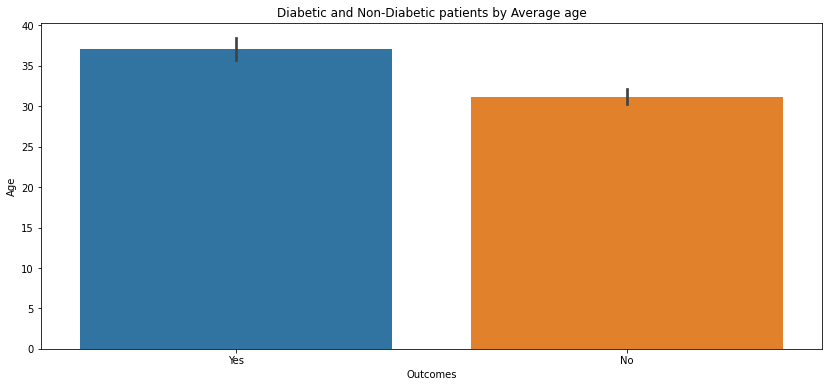

In [19]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Outcome1', y = 'Age', data = diabetes)
plt.xlabel("Outcomes")
plt.title("Diabetic and Non-Diabetic patients by Average age")

- Mean age of diabetic patients is higher compared to the non-diabetic patients.

### Distribution of the data

In [20]:
print(diabetes.Age.max())
print(diabetes.Age.min())

81
21


In [21]:
bins = [21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81]
labels = ["21-26", "26-31", "31-36","36-41", "41-46", "46-51","51-56","56-61","61-66","66-71","71-76",'76-81']
diabetes['Age group'] = pd.cut(diabetes.Age, bins, labels = labels, include_lowest = True)


In [22]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,Age group
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,Yes,46-51
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,No,26-31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,Yes,31-36
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,No,21-26
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Yes,31-36
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,No,61-66
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0,No,26-31
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,No,26-31
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1,Yes,46-51


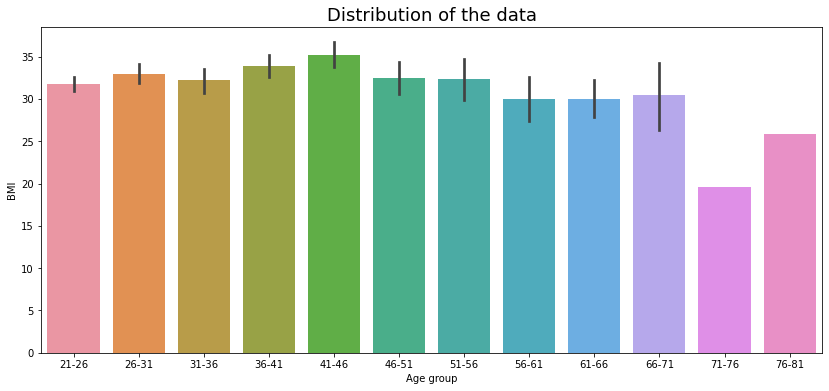

In [23]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'Age group', y = 'BMI', data = diabetes)
plt.title("Distribution of the data", fontsize = 18);

Middle aged patients have high BMI levels which indicates high rates of obesity thus increasing the risk of developing diabetes.

<AxesSubplot:xlabel='BMI', ylabel='BloodPressure'>

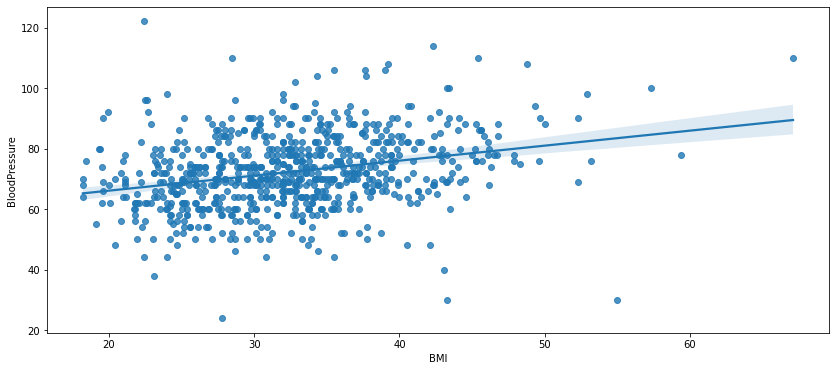

In [24]:
plt.figure(figsize=(14,6))
sns.regplot(x = diabetes.BMI, y = diabetes.BloodPressure)

Increase in the BMI increases the Bloodpressure. As the BMI increases a patient risks a chance 
of developing high blood pressure.

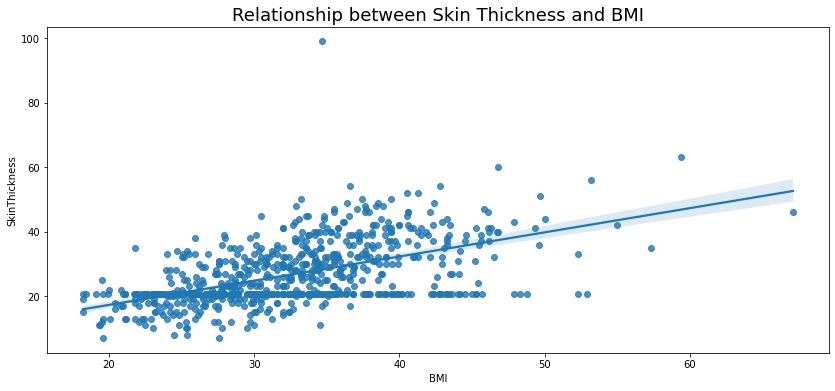

In [25]:
plt.figure(figsize=(14,6))
sns.regplot(y = diabetes.SkinThickness , x = diabetes.BMI)
plt.title("Relationship between Skin Thickness and BMI", fontsize= 18);

There is a strong relationship between the BMI and skin thickness. As the BMI increases the skin thickness also becomes progressively thicker thus a higher risk of developing diabetes. This explains why obese people are likely to have diabetes compared to normal weight people.

Text(0.5, 1.0, 'Relationship between Glucose and Insulin')

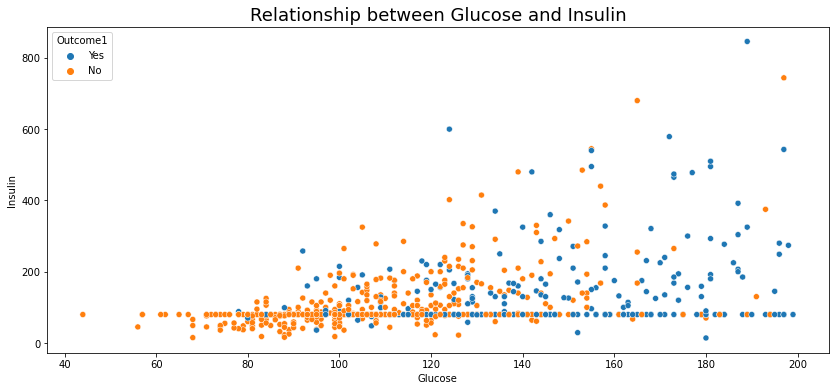

In [26]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = diabetes.Glucose , y = diabetes.Insulin, hue = diabetes.Outcome1)
plt.title("Relationship between Glucose and Insulin", fontsize= 18)

Low glucose levels have no significant effects on Insulin. As the glucose levels increase to higher levels they lead to an increase in the insulin level.

C:\Users\gacek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


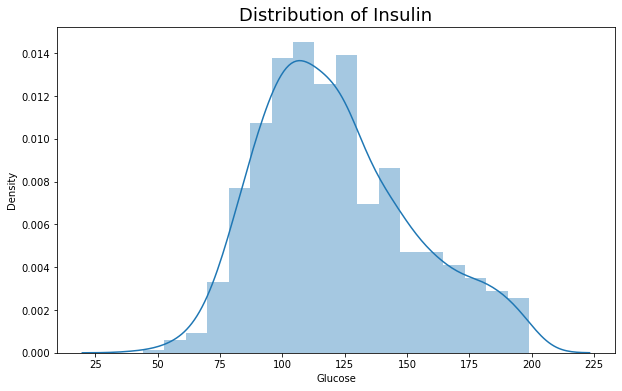

In [28]:
plt.figure(figsize = (10,6))
sns.distplot(diabetes.Glucose);
plt.title("Distribution of Insulin", fontsize = 18);

The high glucose levels indicate a risk of diabetes with the distribution being positively skewed.

### Conclusions

- About 1/3 of the population are diabetic. Pregnancies, SkinThickness and Age risk factors have an effect on diabetes risk.
- High glucose levels increase the level of insulin thus leads to a risk of diabetes.
- Obese people are more likely at a risk compared to normal people.They have a thicker skin which risks them to developing diabetes.
- More middle aged people are more obese thus higher risk to diabetes.